### The Sparks Foundation: Task 5

### Exploratory Data Analysis - Sports  Assignment - 5

### Author:Jayasree Vemula

### Step -1: Importing the required Libraries 

In [337]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")
import os
import mpl_toolkits
import json
print('Libraries are imported Successfully')

Libraries are imported Successfully


### Step-2: Importing the dataset


In [338]:
df_deliveries=pd.read_csv('matches.csv',low_memory=False)
print('Data Read Successfully')

Data Read Successfully


In [339]:
df_deliveries


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [340]:
df_matches = pd.read_csv('matches.csv', low_memory=False)
print('Data Read Successfully')

Data Read Successfully


In [341]:
df_matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


### Step-3 Pre processing of Data

In [342]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [343]:
df_matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [344]:
df_matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [345]:
df_matches['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [346]:
df_deliveries['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [347]:
df_deliveries['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [348]:
df_matches.replace(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], ['RCB', 'SRH', 'PW', 'MI', 'KKR', 'GL', 'KXIP', 'DD','CSK','RR', 'DC', 'KTK','PW','RPS','DC'],inplace =True)

In [349]:
df_deliveries.replace(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], ['RCB', 'SRH', 'PW', 'MI', 'KKR', 'GL', 'KXIP', 'DD','CSK','RR', 'DC', 'KTK','PW','RPS','DC'],inplace =True)

In [350]:
print('Total Matches played:',df_matches.shape[0])
print('\n Venues played at:', df_matches['city'].unique())
print('\n Teams:', df_matches['team1'].unique)

Total Matches played: 756

 Venues played at: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']

 Teams: <bound method Series.unique of 0      SRH
1       MI
2       GL
3       PW
4      RCB
      ... 
751    KKR
752    CSK
753    SRH
754     DC
755     MI
Name: team1, Length: 756, dtype: object>


In [351]:
print('Total venues playes at:', df_matches['city'].nunique())
print('\n Total umpires:', df_matches['umpire1'].nunique())

Total venues playes at: 32

 Total umpires: 61


In [352]:
print((df_matches['player_of_match'].value_counts()).idxmax(), ':has most man of the match awards')
print((df_matches['winner'].value_counts()).idxmax(), ':has the highest number of match wins')


CH Gayle :has most man of the match awards
MI :has the highest number of match wins


In [353]:
df_matches.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [354]:
df_matches.nunique()

id                 756
season              12
city                32
date               546
team1               13
team2               13
toss_winner         13
toss_decision        2
result               3
dl_applied           2
winner              13
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

### Full Data Summary

In [355]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

### Statistical Summary of Data

In [356]:
df_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


### Observations

In [282]:
# The .csv file has data of ipl matches starting from the season 2008 to 2019.
# The biggest margin of victory for the team batting first(win by runs) is 146.
# The biggest victory of the team batting second(win by wickets) is by 10 Wickets.
# 75% of the victorious teams that bat first won by the margin of 19 runs.
# 75% of the victorious teams that bat second won by a margin of 6 Wickets.
# There were 756 Ipl matches hosted from 2008 to 2019.

### Columns in the data

In [357]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

### Getting Unique values of each column

In [358]:
for col in df_matches:
    print(df_matches[col].unique())

[    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   151   152   153   154   155   156
   157   158   159   160   161   162   163   164   

### Finding out Null values in Each Columns

In [359]:
df_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

### Dropping of Columns having signigicant number of Null values

In [360]:
df_matches1 =df_matches.drop(columns=['umpire3'], axis =1)

### Verification of Dropped Column

In [361]:
df_matches


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,MI,PW,PW,field,normal,0,PW,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,PW,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,KKR,MI,MI,field,normal,0,MI,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,CSK,MI,CSK,bat,normal,0,MI,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,SRH,DC,DC,field,normal,0,DC,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,DC,CSK,CSK,field,normal,0,CSK,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [362]:
df_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [363]:
df_matches.fillna(0,inplace=True)

In [364]:
df_matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0
1,2,2017,Pune,2017-04-06,MI,PW,PW,field,normal,0,PW,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,0
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,0
3,4,2017,Indore,2017-04-08,PW,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,0
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,KKR,MI,MI,field,normal,0,MI,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,CSK,MI,CSK,bat,normal,0,MI,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,SRH,DC,DC,field,normal,0,DC,0,2,RR Pant,ACA-VDCA Stadium,0,0,0
754,11414,2019,Visakhapatnam,10/05/19,DC,CSK,CSK,field,normal,0,CSK,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [365]:
df_matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [292]:
# We have successfully replace the Null values with 'Zeros'

In [366]:
df_deliveries.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [367]:
df_deliveries.shape

(756, 18)

In [368]:
df_deliveries.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [369]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [370]:
df_deliveries.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [371]:
df_deliveries.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

###  Countig the Null Values in the data set

In [372]:
df_deliveries.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

### Total number of Nan values in the dataset

In [373]:
df_deliveries.isnull().sum().sum()

656

###  Step - 4 Analysing the data

### Which Team had won by maximum runs?

In [374]:
df_matches.iloc[df_matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                            MI
team2                            DD
toss_winner                      DD
toss_decision                 field
result                       normal
dl_applied                        0
winner                           MI
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                           0
Name: 43, dtype: object

### Which Team had won by maximum wicket?

In [375]:
df_matches.iloc[df_matches['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                                  GL
team2                                                 KKR
toss_winner                                           KKR
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                                                KKR
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

### Which Team had won by minimum Margin?

In [376]:
df_matches.iloc[df_matches[df_matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]

id                                                        59
season                                                  2017
city                                               Hyderabad
date                                              2017-05-21
team1                                                     MI
team2                                                     PW
toss_winner                                               MI
toss_decision                                            bat
result                                                normal
dl_applied                                                 0
winner                                                    MI
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                             NJ Llong
umpire2                 

### Which Team had won by Minimum Wickets?

In [377]:
df_matches.iloc[df_matches[df_matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                             560
season                        2015
city                       Kolkata
date                    2015-05-09
team1                         KXIP
team2                          KKR
toss_winner                   KXIP
toss_decision                  bat
result                      normal
dl_applied                       0
winner                         KKR
win_by_runs                      0
win_by_wickets                   1
player_of_match         AD Russell
venue                 Eden Gardens
umpire1               AK Chaudhary
umpire2            HDPK Dharmasena
umpire3                          0
Name: 559, dtype: object

In [378]:
len(df_matches['season'].unique())

12

In [379]:
df_deliveries.fillna(0,inplace=True)

In [380]:
df_deliveries

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0
1,2,2017,Pune,2017-04-06,MI,PW,PW,field,normal,0,PW,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,0
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,0
3,4,2017,Indore,2017-04-08,PW,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,0
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,KKR,MI,MI,field,normal,0,MI,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,CSK,MI,CSK,bat,normal,0,MI,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,SRH,DC,DC,field,normal,0,DC,0,2,RR Pant,ACA-VDCA Stadium,0,0,0
754,11414,2019,Visakhapatnam,10/05/19,DC,CSK,CSK,field,normal,0,CSK,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [381]:
df_deliveries.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

### The team with most number of Wins per season

In [382]:
teams_per_season =df_matches.groupby('season')['winner'].value_counts()

In [383]:
teams_per_season

season  winner
2008    RR        13
        KXIP      10
        CSK        9
        DD         7
        MI         7
                  ..
2019    KXIP       6
        SRH        6
        RCB        5
        RR         5
        0          1
Name: winner, Length: 103, dtype: int64

In [384]:
"""
for i, w in wins_per_season.iteritmes():
     print(i, w)
for items in win_per_season.iteritems():
     print(items)
"""
year = 2008
win_per_season_df_matches=pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():
    if items[0][0]==year:
        print(items)
        win_series =pd.DataFrame({
            'year': [items[0][0]],
            'team':[items[0][1]],
            'wins':[items[1]]
        })
        win_per_season_df_matches = win_per_season_df_matches.append(win_series)
        year +=1
    
     


((2008, 'RR'), 13)
((2009, 'DD'), 10)
((2010, 'MI'), 11)
((2011, 'CSK'), 11)
((2012, 'KKR'), 12)
((2013, 'MI'), 13)
((2014, 'KXIP'), 12)
((2015, 'CSK'), 10)
((2016, 'SRH'), 11)
((2017, 'MI'), 12)
((2018, 'CSK'), 11)
((2019, 'MI'), 11)


In [385]:
win_per_season_df_matches

,year,team,wins
0,2008,RR,13
0,2009,DD,10
0,2010,MI,11
0,2011,CSK,11
0,2012,KKR,12
0,2013,MI,13
0,2014,KXIP,12
0,2015,CSK,10
0,2016,SRH,11
0,2017,MI,12


### Step- 5 DATA Visualising

In [386]:
venue_ser=df_matches['venue'].value_counts()

In [387]:
venue_df_matches =pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df_matches =pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    
    venue_df_matches = venue_df_matches.append(temp_df_matches,ignore_index=True)

### Ipl Venues

plt.title('Ipl Venues')
sns.barplot(x='matches', y='venue', data =venue_df_matches);

### Number of Matches played and venue

In [388]:
venue_df_matches

,venue,matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


### The most Successful IPL team

In [389]:
team_wins_ser= df_matches['winner'].value_counts()
team_wins_df_matches=pd.DataFrame(columns=['team', 'wins'])
for items in team_wins_ser.iteritems():
    temp_df1 =pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df_matches= team_wins_df_matches.append(temp_df1,ignore_index=True)

### Finding the most successful Ipl team


In [390]:
team_wins_df_matches

,team,wins
0,MI,109
1,CSK,100
2,KKR,92
3,RCB,84
4,KXIP,82
5,RR,75
6,DD,67
7,SRH,58
8,DC,39
9,PW,22


### IPL Victories by team

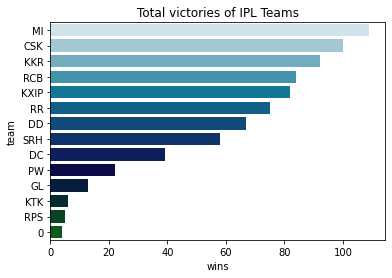

In [391]:
plt.title('Total victories of IPL Teams')
sns.barplot(x='wins', y='team', data =team_wins_df_matches, palette ='ocean_r');


### Most valuable players

In [392]:
mpv_ser=df_matches['player_of_match'].value_counts()

mvp_10_df_matches=pd.DataFrame(columns=['player','wins'])
count = 0
for items in mvp_10_df_matches.iteritems():
    if count>9:
        break
    else:
            temp_df2=pd.DataFrame({
                'player':[items[0]],
                'wins':[items[1]]
            })
            mvp_10_df_matches =mvp_10_df_matches.append(temp_df2,ignore_index=True)
            count += 1
            
             
           

### Top 10 Most valuable players

In [393]:
mvp_10_df_matches

,player,wins
0,player,"Series([], Name: player, dtype: object)"
1,wins,"Series([], Name: wins, dtype: object)"


### Team that won the most number of toss

In [394]:
toss_ser =df_matches['toss_winner'].value_counts()
toss_df_matches=pd.DataFrame(columns=['team','wins'])

for items in toss_ser.iteritems():
    temp_df3=pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df_matches = toss_df_matches.append(temp_df3,ignore_index=True)

### Count of Number of toss wins and teams

In [395]:
toss_df_matches

,team,wins
0,MI,98
1,KKR,92
2,CSK,89
3,RCB,81
4,KXIP,81
5,RR,80
6,DD,80
7,DC,53
8,SRH,46
9,PW,26


### Teams which has won More number of Toss

<AxesSubplot:title={'center':'Which team won more number of Toss'}, xlabel='wins', ylabel='team'>

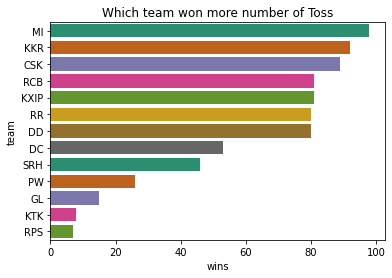

In [396]:
plt.title('Which team won more number of Toss')
sns.barplot(x='wins', y='team', data=toss_df_matches, palette='Dark2')

### Observations


In [324]:
# Mumbai Indians has won the most toss(till 2019) in ipl history.


### Numbebr of Matches won by team

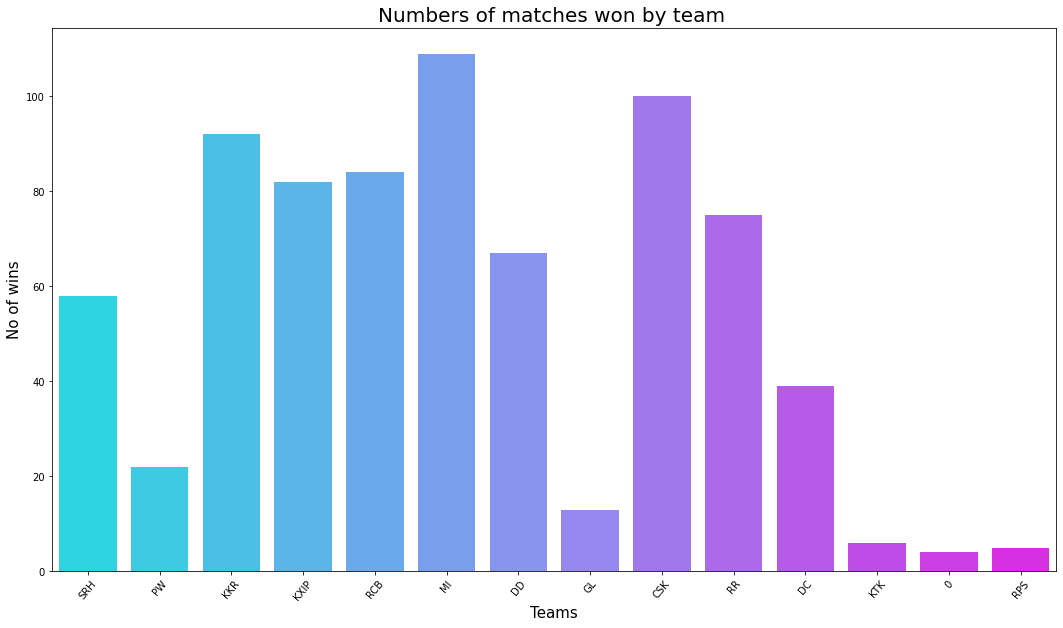

In [397]:
plt.figure(figsize = (18,10))
sns.countplot(x='winner',data=df_matches, palette='cool')
plt.title("Numbers of matches won by team ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

In [398]:
df_matches.result.value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

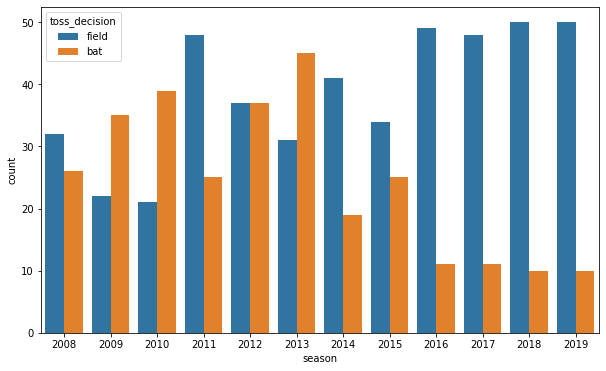

In [399]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season', hue='toss_decision', data=df_matches)
plt.show()

### Maximum Toss Winner

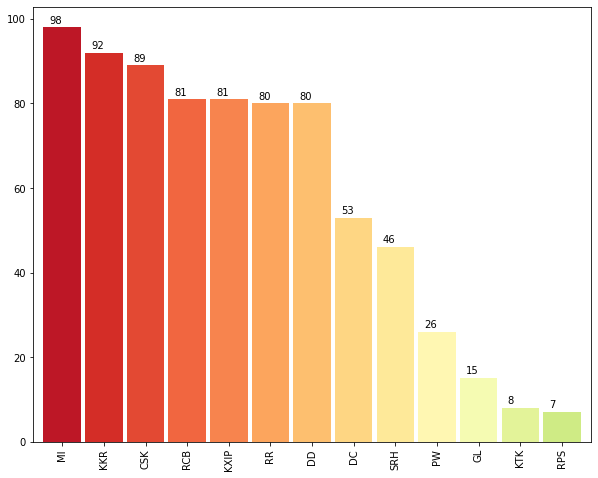

In [400]:
plt.subplots(figsize=(10,8))
ax=df_matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn', 20))
for p in ax.patches:
          ax.annotate(format(p.get_height()),(p.get_x()+0.15, p.get_height()+1))
plt.show()                                                     
                                                     
                                                     
                                                     
                                                

### Matches played across each seasons

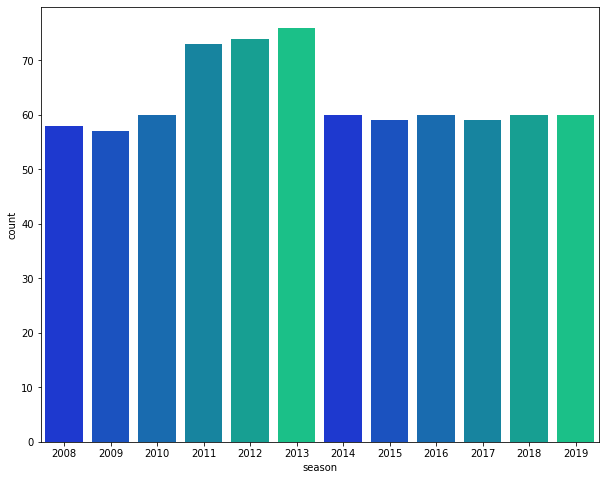

In [401]:
plt.subplots(figsize=(10,8))
sns.countplot(x='season', data=df_matches,palette=sns.color_palette('winter'))
plt.show()

### Number of matches won by Toss winning side

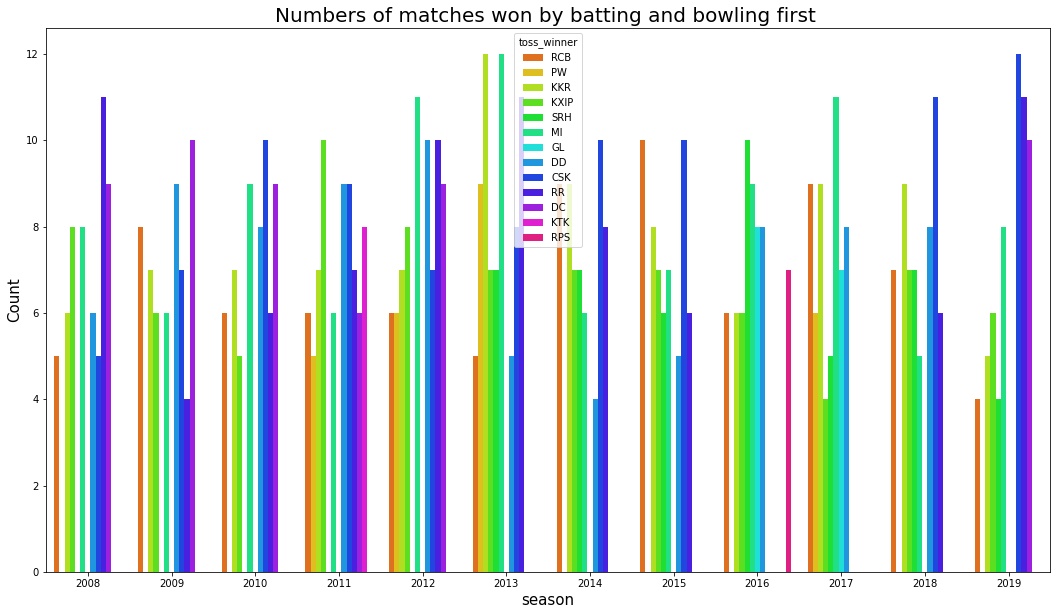

In [402]:
plt.figure(figsize = (18,10))
sns.countplot('season',hue='toss_winner',data=df_matches,palette='hsv')
plt.title("Numbers of matches won by batting and bowling first ",fontsize=20)
plt.xlabel("season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [331]:
df_matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0
1,2,2017,Pune,2017-04-06,MI,PW,PW,field,normal,0,PW,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,0
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,0
3,4,2017,Indore,2017-04-08,PW,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,0
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,KKR,MI,MI,field,normal,0,MI,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,CSK,MI,CSK,bat,normal,0,MI,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,SRH,DC,DC,field,normal,0,DC,0,2,RR Pant,ACA-VDCA Stadium,0,0,0
754,11414,2019,Visakhapatnam,10/05/19,DC,CSK,CSK,field,normal,0,CSK,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [332]:
# we will print winner season wise
final_matches=df_matches.drop_duplicates(subset=['season'], keep='last')

final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,RR
2,2009,DC
3,2010,CSK
4,2011,CSK
5,2012,KKR
6,2013,MI
7,2014,KKR
8,2015,MI
9,2016,SRH
0,2017,MI


In [333]:
# we will print number of season won by teams
final_matches["winner"].value_counts()

MI     4
CSK    3
KKR    2
SRH    1
RR     1
DC     1
Name: winner, dtype: int64

In [334]:
# we will print toss winner, toss decision, winner in final matches.
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,MI,bat,MI
1,RR,field,RR
2,RCB,field,DC
3,CSK,bat,CSK
4,CSK,bat,CSK
5,CSK,bat,KKR
6,MI,bat,MI
7,KKR,field,KKR
8,CSK,field,MI
9,SRH,bat,SRH


In [335]:
# we will print man of the match
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,MI,KH Pandya
1,RR,YK Pathan
2,DC,A Kumble
3,CSK,SK Raina
4,CSK,M Vijay
5,KKR,MS Bisla
6,MI,KA Pollard
7,KKR,MK Pandey
8,MI,RG Sharma
9,SRH,BCJ Cutting


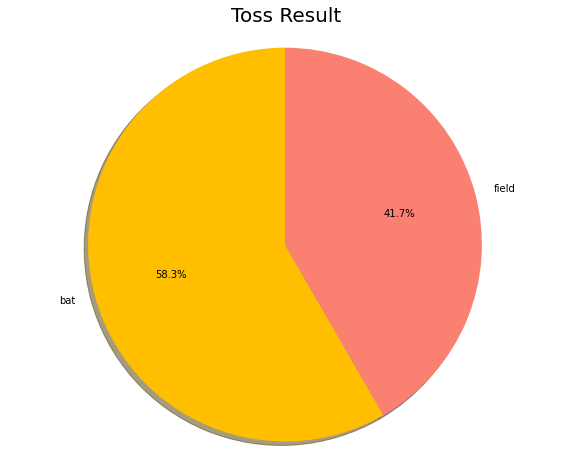

In [336]:
Toss=final_matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss Result', fontsize=20)
plt.axis('equal')
plt.show()

### Conslusion :

The highest number of match played in IPL season was 2013,2014,2015.

The highest number of match won by Mumbai Indians i.e 4 match out of 12 matches.

Teams which Bowl first has higher chances of winning then the team which bat first.

After winning toss more teams decide to do fielding first.

In finals teams which decide to do fielding first win the matches more then the team which bat first.

In finals most teams after winning toss decide to do fielding first.

Top player of match winning are CH gayle, AB de villers.

It is interesting that out of 12 IPL finals,9 times the team that won the toss was also the winner of IPL.

The highest number of four hit by player is Shikar Dhawan.

The highest number of six hit by player is CH gayle.

Top leading run scorer in IPL are Virat kholi, SK Raina, RG Sharma.

Dismissals in IPL was most by Catch out.

The IPL most wicket taken blower is Harbajan Singh.

The highest number of matches played by player name are SK Raina, RG Sharma.
